In [74]:
#Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

In [76]:
pd.options.display.max_rows=100

In [75]:
#Loading the data

In [4]:
df_air=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/airpassengers/airpassengers.csv',parse_dates=['Month'])

In [5]:
df_air.shape

(144, 2)

In [6]:
df_air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [34]:
df_air.Month.min(),df_air.Month.max()

AttributeError: 'DataFrame' object has no attribute 'Month'

In [8]:
df_air=df_air.set_index('Month')

In [9]:
df_air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


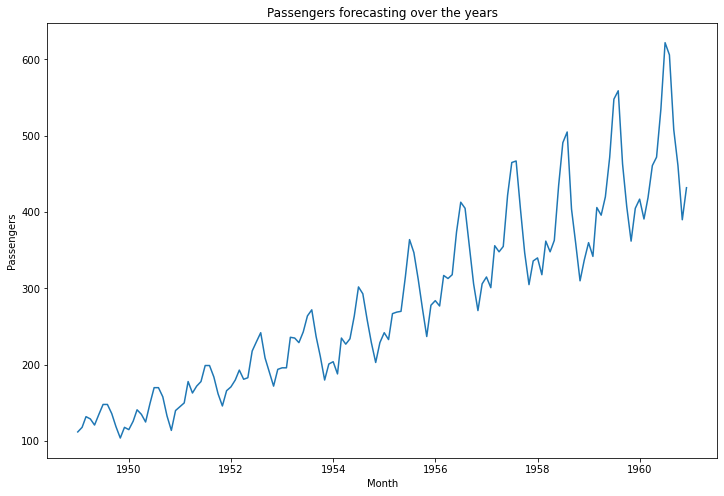

In [10]:
#plotting the time series data
plt.figure(figsize=(12,8))
plt.plot(df_air['#Passengers'])
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Passengers forecasting over the years')
plt.show()

In [11]:
#test for stationarity

In [12]:
from statsmodels.tsa.stattools import kpss

In [13]:
#KPSS test
#H0=stationary
#H1=non-stationary

In [17]:
kpss_res=kpss(df_air,nlags='auto')

In [18]:
kpss_res[0]

1.6513122354165206

In [19]:
kpss_res[1]

0.01

Since p value is less than 0.05, we reject the null hypothesis.Hence the data is not stationary.

In [20]:
#decomposing the timeseries

In [21]:
import statsmodels.api as sm
from pylab import rcParams

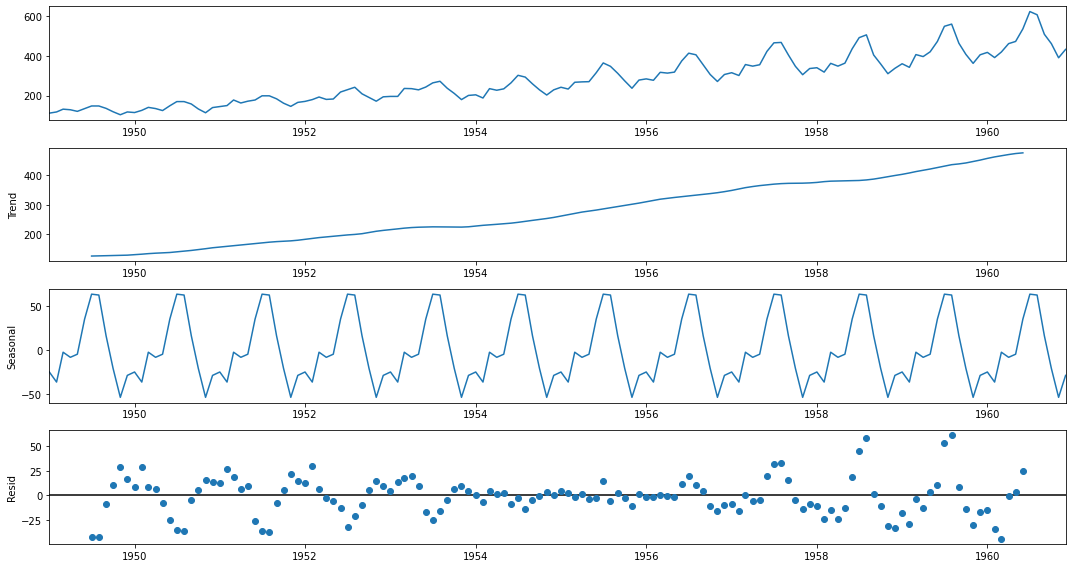

In [22]:
rcParams['figure.figsize']=15,8
decomposition=sm.tsa.seasonal_decompose(df_air,model='additive')
decomposition.plot()
plt.show()

In [23]:
#forecasting the model

In [24]:
import itertools

In [25]:
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [26]:
for i in range(len(pdq)):
    print('SARIMAX: {} x {}'.format(pdq[i],seasonal_pdq[i]))

SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 2) x (0, 0, 2, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 2, 0) x (0, 2, 0, 12)
SARIMAX: (0, 2, 1) x (0, 2, 1, 12)
SARIMAX: (0, 2, 2) x (0, 2, 2, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 0, 2) x (1, 0, 2, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 2, 0) x (1, 2, 0, 12)
SARIMAX: (1, 2, 1) x (1, 2, 1, 12)
SARIMAX: (1, 2, 2) x (1, 2, 2, 12)
SARIMAX: (2, 0, 0) x (2, 0, 0, 12)
SARIMAX: (2, 0, 1) x (2, 0, 1, 12)
SARIMAX: (2, 0, 2) x (2, 0, 2, 12)
SARIMAX: (2, 1, 0) x (2, 1, 0, 12)
SARIMAX: (2, 1, 1) x (2, 1, 1, 12)
SARIMAX: (2, 1, 2) x (2, 1, 2, 12)
SARIMAX: (2, 2, 0) x (2, 2, 0, 12)
SARIMAX: (2, 2, 1) x (2, 2, 1, 12)
SARIMAX: (2, 2, 2) x (2, 2, 2, 12)


In [27]:
#model building

In [28]:
aic_scores={}
i=1

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(df_air,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=model.fit()
            print('ARIMA: {} x {}12.AIC: {}'.format(i,param,param_seasonal,results.aic))
            aic_scores[i]=results.aic
            i+=1
        except:
            continue

ARIMA: 1 x (0, 0, 0)12.AIC: (0, 0, 0, 12)
ARIMA: 2 x (0, 0, 0)12.AIC: (0, 0, 1, 12)
ARIMA: 3 x (0, 0, 0)12.AIC: (0, 0, 2, 12)
ARIMA: 4 x (0, 0, 0)12.AIC: (0, 1, 0, 12)
ARIMA: 5 x (0, 0, 0)12.AIC: (0, 1, 1, 12)
ARIMA: 6 x (0, 0, 0)12.AIC: (0, 1, 2, 12)
ARIMA: 7 x (0, 0, 0)12.AIC: (0, 2, 0, 12)
ARIMA: 8 x (0, 0, 0)12.AIC: (0, 2, 1, 12)
ARIMA: 9 x (0, 0, 0)12.AIC: (0, 2, 2, 12)
ARIMA: 10 x (0, 0, 0)12.AIC: (1, 0, 0, 12)
ARIMA: 11 x (0, 0, 0)12.AIC: (1, 0, 1, 12)
ARIMA: 12 x (0, 0, 0)12.AIC: (1, 0, 2, 12)
ARIMA: 13 x (0, 0, 0)12.AIC: (1, 1, 0, 12)
ARIMA: 14 x (0, 0, 0)12.AIC: (1, 1, 1, 12)
ARIMA: 15 x (0, 0, 0)12.AIC: (1, 1, 2, 12)
ARIMA: 16 x (0, 0, 0)12.AIC: (1, 2, 0, 12)
ARIMA: 17 x (0, 0, 0)12.AIC: (1, 2, 1, 12)
ARIMA: 18 x (0, 0, 0)12.AIC: (1, 2, 2, 12)
ARIMA: 19 x (0, 0, 0)12.AIC: (2, 0, 0, 12)
ARIMA: 20 x (0, 0, 0)12.AIC: (2, 0, 1, 12)
ARIMA: 21 x (0, 0, 0)12.AIC: (2, 0, 2, 12)
ARIMA: 22 x (0, 0, 0)12.AIC: (2, 1, 0, 12)
ARIMA: 23 x (0, 0, 0)12.AIC: (2, 1, 1, 12)
ARIMA: 24 x (0, 0, 0

ARIMA: 191 x (0, 2, 1)12.AIC: (0, 0, 1, 12)
ARIMA: 192 x (0, 2, 1)12.AIC: (0, 0, 2, 12)
ARIMA: 193 x (0, 2, 1)12.AIC: (0, 1, 0, 12)
ARIMA: 194 x (0, 2, 1)12.AIC: (0, 1, 1, 12)
ARIMA: 195 x (0, 2, 1)12.AIC: (0, 1, 2, 12)
ARIMA: 196 x (0, 2, 1)12.AIC: (0, 2, 0, 12)
ARIMA: 197 x (0, 2, 1)12.AIC: (0, 2, 1, 12)
ARIMA: 198 x (0, 2, 1)12.AIC: (0, 2, 2, 12)
ARIMA: 199 x (0, 2, 1)12.AIC: (1, 0, 0, 12)
ARIMA: 200 x (0, 2, 1)12.AIC: (1, 0, 1, 12)
ARIMA: 201 x (0, 2, 1)12.AIC: (1, 0, 2, 12)
ARIMA: 202 x (0, 2, 1)12.AIC: (1, 1, 0, 12)
ARIMA: 203 x (0, 2, 1)12.AIC: (1, 1, 1, 12)
ARIMA: 204 x (0, 2, 1)12.AIC: (1, 1, 2, 12)
ARIMA: 205 x (0, 2, 1)12.AIC: (1, 2, 0, 12)
ARIMA: 206 x (0, 2, 1)12.AIC: (1, 2, 1, 12)
ARIMA: 207 x (0, 2, 1)12.AIC: (1, 2, 2, 12)
ARIMA: 208 x (0, 2, 1)12.AIC: (2, 0, 0, 12)
ARIMA: 209 x (0, 2, 1)12.AIC: (2, 0, 1, 12)
ARIMA: 210 x (0, 2, 1)12.AIC: (2, 0, 2, 12)
ARIMA: 211 x (0, 2, 1)12.AIC: (2, 1, 0, 12)
ARIMA: 212 x (0, 2, 1)12.AIC: (2, 1, 1, 12)
ARIMA: 213 x (0, 2, 1)12.AIC: (2

ARIMA: 378 x (1, 1, 1)12.AIC: (2, 2, 2, 12)
ARIMA: 379 x (1, 1, 2)12.AIC: (0, 0, 0, 12)
ARIMA: 380 x (1, 1, 2)12.AIC: (0, 0, 1, 12)
ARIMA: 381 x (1, 1, 2)12.AIC: (0, 0, 2, 12)
ARIMA: 382 x (1, 1, 2)12.AIC: (0, 1, 0, 12)
ARIMA: 383 x (1, 1, 2)12.AIC: (0, 1, 1, 12)
ARIMA: 384 x (1, 1, 2)12.AIC: (0, 1, 2, 12)
ARIMA: 385 x (1, 1, 2)12.AIC: (0, 2, 0, 12)
ARIMA: 386 x (1, 1, 2)12.AIC: (0, 2, 1, 12)
ARIMA: 387 x (1, 1, 2)12.AIC: (0, 2, 2, 12)
ARIMA: 388 x (1, 1, 2)12.AIC: (1, 0, 0, 12)
ARIMA: 389 x (1, 1, 2)12.AIC: (1, 0, 1, 12)
ARIMA: 390 x (1, 1, 2)12.AIC: (1, 0, 2, 12)
ARIMA: 391 x (1, 1, 2)12.AIC: (1, 1, 0, 12)
ARIMA: 392 x (1, 1, 2)12.AIC: (1, 1, 1, 12)
ARIMA: 393 x (1, 1, 2)12.AIC: (1, 1, 2, 12)
ARIMA: 394 x (1, 1, 2)12.AIC: (1, 2, 0, 12)
ARIMA: 395 x (1, 1, 2)12.AIC: (1, 2, 1, 12)
ARIMA: 396 x (1, 1, 2)12.AIC: (1, 2, 2, 12)
ARIMA: 397 x (1, 1, 2)12.AIC: (2, 0, 0, 12)
ARIMA: 398 x (1, 1, 2)12.AIC: (2, 0, 1, 12)
ARIMA: 399 x (1, 1, 2)12.AIC: (2, 0, 2, 12)
ARIMA: 400 x (1, 1, 2)12.AIC: (2

ARIMA: 565 x (2, 0, 2)12.AIC: (2, 2, 0, 12)
ARIMA: 566 x (2, 0, 2)12.AIC: (2, 2, 1, 12)
ARIMA: 567 x (2, 0, 2)12.AIC: (2, 2, 2, 12)
ARIMA: 568 x (2, 1, 0)12.AIC: (0, 0, 0, 12)
ARIMA: 569 x (2, 1, 0)12.AIC: (0, 0, 1, 12)
ARIMA: 570 x (2, 1, 0)12.AIC: (0, 0, 2, 12)
ARIMA: 571 x (2, 1, 0)12.AIC: (0, 1, 0, 12)
ARIMA: 572 x (2, 1, 0)12.AIC: (0, 1, 1, 12)
ARIMA: 573 x (2, 1, 0)12.AIC: (0, 1, 2, 12)
ARIMA: 574 x (2, 1, 0)12.AIC: (0, 2, 0, 12)
ARIMA: 575 x (2, 1, 0)12.AIC: (0, 2, 1, 12)
ARIMA: 576 x (2, 1, 0)12.AIC: (0, 2, 2, 12)
ARIMA: 577 x (2, 1, 0)12.AIC: (1, 0, 0, 12)
ARIMA: 578 x (2, 1, 0)12.AIC: (1, 0, 1, 12)
ARIMA: 579 x (2, 1, 0)12.AIC: (1, 0, 2, 12)
ARIMA: 580 x (2, 1, 0)12.AIC: (1, 1, 0, 12)
ARIMA: 581 x (2, 1, 0)12.AIC: (1, 1, 1, 12)
ARIMA: 582 x (2, 1, 0)12.AIC: (1, 1, 2, 12)
ARIMA: 583 x (2, 1, 0)12.AIC: (1, 2, 0, 12)
ARIMA: 584 x (2, 1, 0)12.AIC: (1, 2, 1, 12)
ARIMA: 585 x (2, 1, 0)12.AIC: (1, 2, 2, 12)
ARIMA: 586 x (2, 1, 0)12.AIC: (2, 0, 0, 12)
ARIMA: 587 x (2, 1, 0)12.AIC: (2

In [29]:
#finding the key for lowest aic score

In [30]:
min(aic_scores.values())

715.1568766791964

In [31]:
min(aic_scores,key=aic_scores.get)

630

We will build the model using pdq=(2,1,2) and seasonal_pdq=(0,2,2,12)

In [32]:
final_model=sm.tsa.statespace.SARIMAX(df_air,
                                           order=(2,1,2),
                                           seasonal_order=(0,2,2,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
final_result=final_model.fit()

In [33]:
#predicting the result

In [36]:
pred=final_result.get_prediction(start=pd.to_datetime('1960-01-01'),dynamic=False)

In [37]:
pred.predicted_mean

1960-01-01    433.816992
1960-02-01    393.539088
1960-03-01    442.890658
1960-04-01    426.603673
1960-05-01    467.307898
1960-06-01    538.631851
1960-07-01    624.731470
1960-08-01    613.549998
1960-09-01    506.241300
1960-10-01    462.677503
1960-11-01    393.663674
1960-12-01    435.150348
Freq: MS, Name: predicted_mean, dtype: float64

            lower #Passengers  upper #Passengers
1960-01-01         414.019499         453.614486
1960-02-01         373.880282         413.197895
1960-03-01         423.232510         462.548807
1960-04-01         406.967054         446.240292
1960-05-01         447.682334         486.933462
1960-06-01         519.007895         558.255808
1960-07-01         605.124356         644.338584
1960-08-01         593.948877         633.151120
1960-09-01         486.642616         525.839985
1960-10-01         443.091619         482.263387
1960-11-01         374.080760         413.246589
1960-12-01         415.570415         454.730281


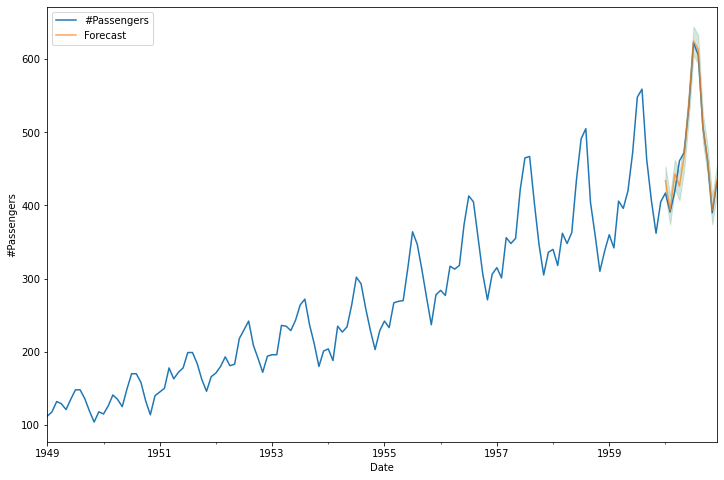

In [53]:
pred_ci=pred.conf_int()
print(pred_ci)

ax=df_air['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Forecast',alpha=.7,figsize=(12,8))
ax.fill_between(pred_ci.index,
               pred_ci['lower #Passengers'],
               pred_ci['upper #Passengers'],color='seagreen',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()
plt.show()

In [45]:
#Predicting for future timeframe

In [46]:
future_pred=final_result.get_prediction(start=pd.to_datetime('1961-01-01'),end=pd.to_datetime('1961-12-01'),dynamic=False)

In [48]:
future_pred.predicted_mean

1961-01-01    459.213334
1961-02-01    414.478344
1961-03-01    472.034796
1961-04-01    495.421369
1961-05-01    497.932332
1961-06-01    579.393030
1961-07-01    669.241423
1961-08-01    651.382074
1961-09-01    553.834641
1961-10-01    498.890880
1961-11-01    421.786056
1961-12-01    476.751124
Freq: MS, Name: predicted_mean, dtype: float64

In [49]:
future_pred_ci=future_pred.conf_int()
print(future_pred_ci)

            lower #Passengers  upper #Passengers
1961-01-01         439.642842         478.783826
1961-02-01         389.731574         439.225114
1961-03-01         440.930512         503.139080
1961-04-01         459.039165         531.803573
1961-05-01         458.464566         537.400097
1961-06-01         535.513360         623.272701
1961-07-01         621.672738         716.810109
1961-08-01         601.341482         701.422667
1961-09-01         500.162647         607.506635
1961-10-01         442.314888         555.466872
1961-11-01         363.036887         480.535225
1961-12-01         414.838436         538.663811


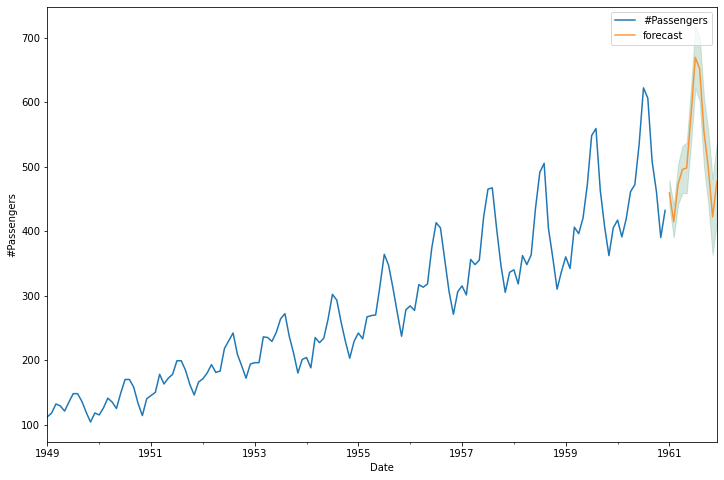

In [52]:
ax=df_air['1949':].plot(label='observed')
future_pred.predicted_mean.plot(ax=ax,label='forecast',alpha=.8,figsize=(12,8))

ax.fill_between(future_pred_ci.index,
               future_pred_ci['lower #Passengers'],
               future_pred_ci['upper #Passengers'],color='seagreen',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()
plt.show()

In [54]:
#Calculating RMSE

In [60]:
y_actual=df_air['1960':].values.reshape(1,-1)
y_actual

array([[417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]],
      dtype=int64)

In [62]:
y_pred=pred.predicted_mean.values
y_pred

array([433.81699214, 393.53908829, 442.89065837, 426.60367307,
       467.30789769, 538.63185149, 624.73146966, 613.54999844,
       506.24130038, 462.67750263, 393.66367448, 435.15034799])

In [66]:
y_actual-y_pred

array([[-16.81699214,  -2.53908829, -23.89065837,  34.39632693,
          4.69210231,  -3.63185149,  -2.73146966,  -7.54999844,
          1.75869962,  -1.67750263,  -3.66367448,  -3.15034799]])

In [68]:
mse=((y_actual-y_pred)**2).mean().round(2)
mse

181.0

In [70]:
rmse=np.sqrt(mse).round(2)
rmse

13.45

In [73]:
print('MSE: {}, RMSE: {}'.format(mse,rmse))

MSE: 181.0, RMSE: 13.45
